## Student Name: Thorat Nikhil
### Feature Engineering Semester Project
#### TOPIC : Image Classification using PCA and Convolutional Neural Network

## Objective and Process :
The objective of this project is to develop an image classification system capable of accurately distinguishing between images of circles and triangles. Leveraging original images created in graphic software and employing image augmentation techniques, the project aims to build a diverse and augmented dataset. The application of Principal Component Analysis (PCA) serves to reduce the dimensionality of the images while retaining essential features. Subsequently, a machine learning classifier is trained on the reduced-dimensional representations to achieve effective classification. The choice of classifier, is kept as SVC but any other clarrifier could work. Through systematic training, evaluation, and interpretation, the project seeks to produce a reliable and interpretable model for image classification.



### ImageDataGenerator( ) from keras
For generating multiple images of circles and triangles I have used ImageDataGenerator function from Keras.preprocessing.image library.


Here's the link of TF documentations for reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [117]:
datagen = ImageDataGenerator(
rotation_range = 40,
width_shift_range = 0.1,
shear_range= 0.2,
#zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True,fill_mode = "nearest")

#Loading Triangle Image
img = load_img("/Users/nikhilthorat/Desktop/PCA_data/Triangle/Triangle1.png")


In [118]:
x = img_to_array(img)
x=x.reshape((1,) + x.shape)
# this loop will save about 70 images of triangles generated by our ImageDatagen() , save location I have provided as below.
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir = "/Users/nikhilthorat/Desktop/PCA_data/Triangle",save_format = ".png"):
    i +=1
    if i > 70:
        break
        


In [119]:
#Done with Triangles now towards the cirlces.
img1 = load_img("/Users/nikhilthorat/Desktop/PCA_data/circle/circle1.png")
y = img_to_array(img1)
y=y.reshape((1,) + y.shape)
# this loop will save about 70 images of circles generated by our ImageDatagen() , save location I have provided as below.
i = 0
for batch in datagen.flow(y, batch_size=1,save_to_dir = "/Users/nikhilthorat/Desktop/PCA_data/circle",save_format = ".png"):
    i +=1
    if i > 70:
        break

### Just to show how images will be generated using ImageDataGenerator below I have generated 3 images of Triangles using this function.

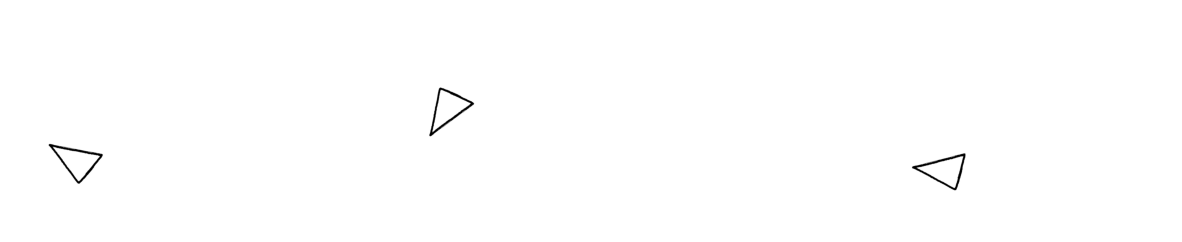

In [120]:
# ImageDataGenerator flipping

datagen = ImageDataGenerator(rotation_range = 40 ,vertical_flip=True)

# iterator
aug_iter = datagen.flow(x, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

###  => Now that our images are stored in provided path, we can import those images to form a dataset

In [121]:
import os

# Specify the path to the "circle" folder on the desktop
desktop_path = os.path.expanduser("~/Desktop/PCA_data/circle")

# Create an empty list to store the loaded images
circles = []

# Loop through the files in the "circle" folder
for filename in os.listdir(desktop_path):
    if filename.endswith(".png"):  # images are in PNG format
        # Load the image
        image_path = os.path.join(desktop_path, filename)
        img = cv2.imread(image_path)

        # Append the loaded image to the list
        circles.append(img)


In [122]:
#Repeat the same for Triangle's images

desktop_path1 = os.path.expanduser("~/Desktop/PCA_data/Triangle")

# Create an empty list to store the loaded images
Triangles = []

# Loop through the files in the "Triangle" folder
for filename in os.listdir(desktop_path1):
    if filename.endswith(".png"): 
        # Load the image
        image_path = os.path.join(desktop_path1, filename)
        img = cv2.imread(image_path)

        # Append the loaded image to the list
        Triangles.append(img)

### Now that we have our cicles and Triangles list , we need to create labels for the same. Below i am assigning 0 to cirlces (because 0 looks like a circle 😄 ) and 1 to triangle



In [123]:
#for cirlces
label = 0

# Create a list of tuples where each tuple contains an image and its label
circle_list = [(image, label) for image in circles]

#for triangles
label1 = 1

# Create a list of tuples where each tuple contains an image and its label
Triangles_list = [(image, label1) for image in Triangles]

### Mixing both circles_list and Triangles_list randomely  and visualization

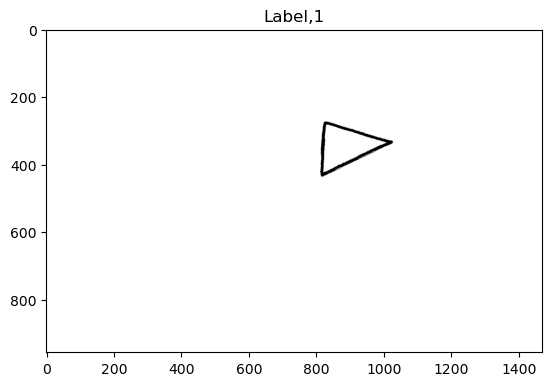

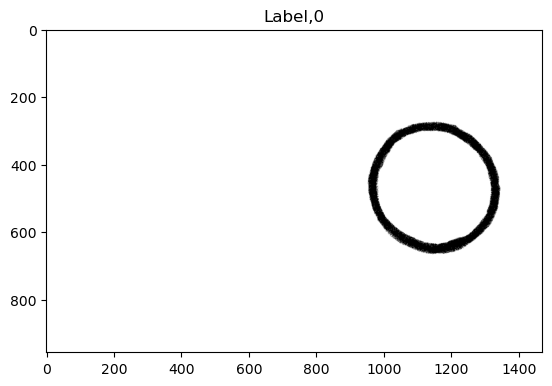

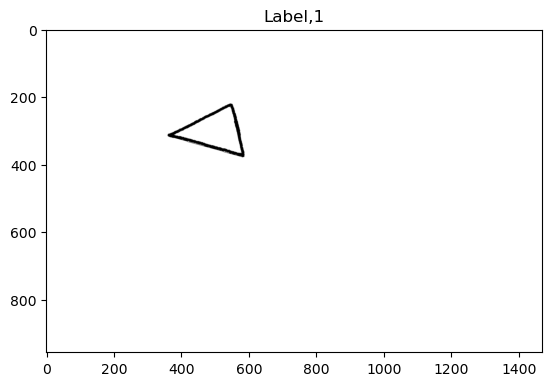

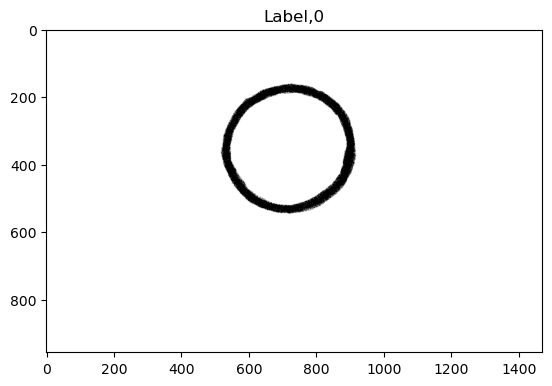

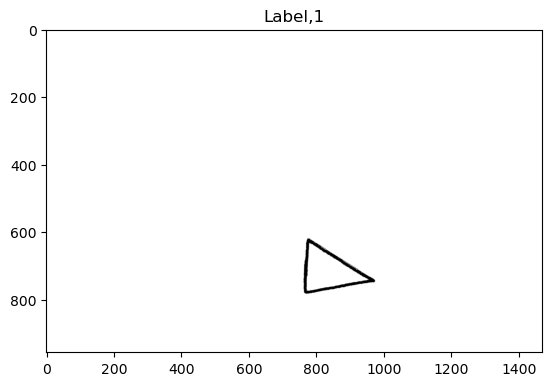

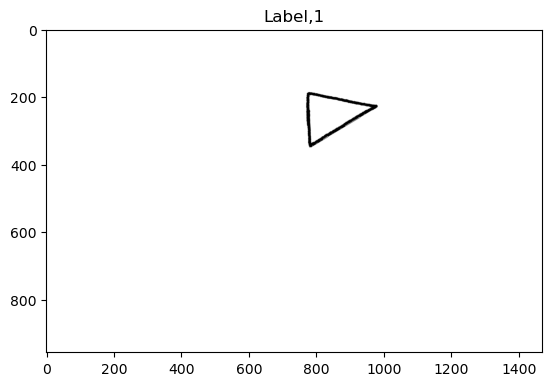

In [124]:
final_data = circle_list+Triangles_list
import random
random.shuffle(final_data)
#Lets visualize first 5 elements of final_data to check if labels matches the images
count = 0
for image,label in final_data:
    count +=1
    plt.imshow(image)
    plt.title(f"Label,{label}")
    plt.show()
    if count > 5:
        break

### In the below code I took the original image imported before image augmentation, which has dimentions of (x,y,z) and converted it to grescale i.e, removed its third dimention.
This was done as PCA only took 2D for fitting

(956, 1470)
1.0


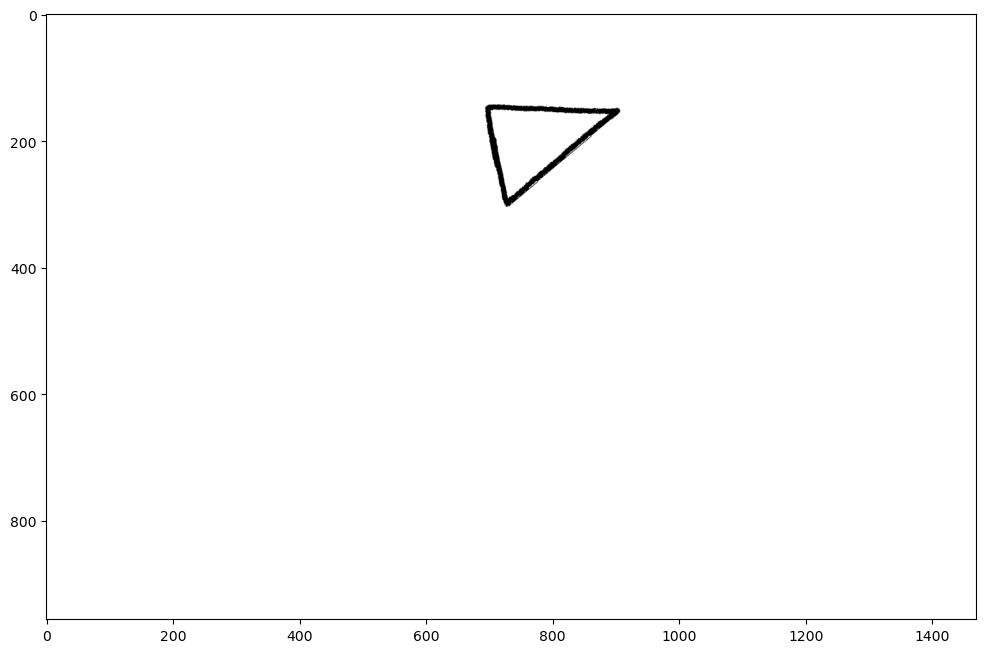

In [125]:

I = numpy.asarray(img)
type(I)


image_sum = I.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

### in the cell below I applied PCA to our image_bw to get the components explaining 95% of variance , I have also visualized the same using plots.

Number of components explaining 95% variance: 18


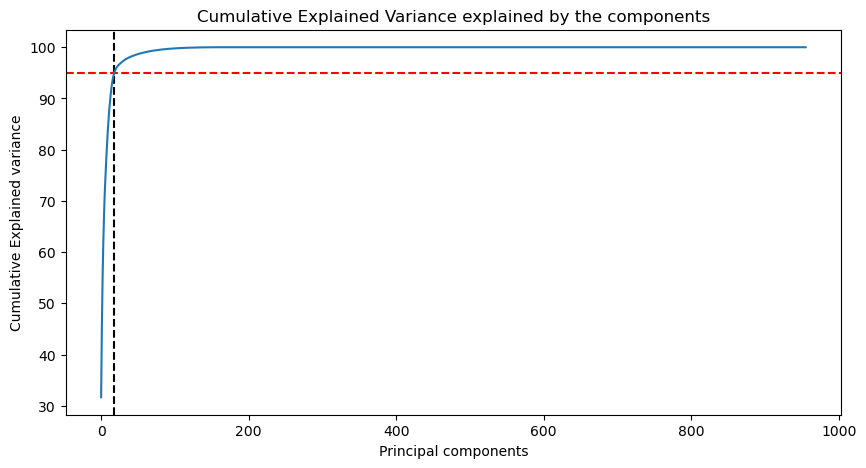

In [126]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

### The above data shows that only 18 of the components explained 95% of variance, however this is just one image, so in the below cell i have calculated the average of "k" for all images in our final_data

In [127]:
#splitting labels and images into Y and X datasets respectively
X = [image for image,_ in final_data]
Y = [label for _,label in final_data]

#converting all the images to 2D
X_bw = []
for I in X:
    image_sum = I.sum(axis=2)
    

    image_bw = image_sum/image_sum.max()
    
    X_bw.append(image_bw)
    
    
average_k_values = []

for image in X_bw:
    
    # Apply PCA
    pca = PCA()
    pca.fit(image)

    # Getting the cumulative variance
    var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

    # How many PCs explain 95% of the variance?
    k = np.argmax(var_cumu > 95)
    average_k_values.append(k)

# Compute the average value of k
average_k = np.mean(average_k_values)

print("Average number of components explaining 95% variance: " + str(average_k))

Average number of components explaining 95% variance: 19.77358490566038


In [128]:
#Rounding off to nearest whole number ie, 20
k = round(k)

X_bw_flattened = [image.flatten() for image in X_bw]

### So now our n_components for PCA will be k

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components = k).fit(X_bw_flattened)
X_pca = pca.transform(X_bw_flattened)

In [130]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_bw_flattened , Y,test_size=0.4, random_state=42)

In [131]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

clf = SVC(kernel = 'rbf',class_weight = 'balanced')

clf.fit(X_train,y_train)

SVC(class_weight='balanced')

In [132]:
#scoring the PCA transformed data
clf.score(X_test,y_test)

y_pred_pca = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred_pca)

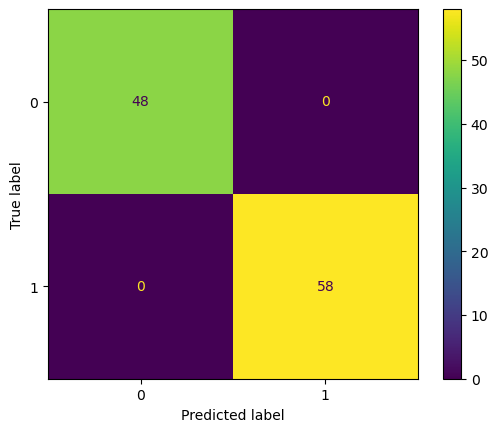

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()

### SUMMERY:
#### 1.Dataset Creation:
To construct a dataset for image classification, I designed original images depicting circles and triangles using graphic software, such as Paint. These images serve as the foundation for training and evaluating a classification model.

#### 2.Image Augmentation
Employing image augmentation techniques, I introduced variations to the original images, creating an augmented dataset. These variations include rotations, scaling adjustments, and other geometric transformations. The augmented dataset aims to enhance the model's ability to generalize and recognize diverse instances of circles and triangles.

#### 3.Principal Component Analysis (PCA) for Dimensionality Reduction:
Recognizing the high-dimensionality of image data, each image was initially represented as a vector of pixel values. PCA was applied to identify the principal components capturing the most significant variability in the images. By retaining a subset of these components, the dimensionality of the image data was effectively reduced while preserving essential features.

#### 4.Image Classification:
Utilizing a machine learning classifier, our model was trained to distinguish between images of circles and triangles. The reduced-dimensional representations obtained through PCA form the basis for the model's learning process.Choice of classifier was Support Vector Classifier (SVC)
The dataset was partitioned into training and testing sets. The classifier, trained on the reduced feature representations, underwent evaluation on the testing set to gauge its performance

#### References:
https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example/notebook

https://www.kaggle.com/code/jonathankristanto/experimenting-with-pca-on-mnist-dataset

https://www.youtube.com/watch?v=hxLU32zhze0&t=302s

